# Analyse Decision Tree

In [1]:
import numpy as np
import time

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

start = time.time()
cancer = load_breast_cancer()


X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, stratify=cancer.target, train_size=0.7, random_state=66)

max_tree_depth = 3

clf = DecisionTreeClassifier(random_state=0,max_depth=max_tree_depth)

clf.fit(X_train, y_train)

score_test =  clf.score(X_test, y_test)
score_train = clf.score(X_train,y_train)

print('Decision tree (fully grown) test set score is %.3f'
      %(score_test))
print('Decision tree (fully grown) training set score is %.3f'
      %(score_train))
print('time elapsed: %.3f [s]' % (time.time()-start))

Decision tree (fully grown) test set score is 0.918
Decision tree (fully grown) training set score is 0.977
time elapsed: 0.058 [s]


## Visualize tree

In [2]:
from sklearn.tree import export_graphviz
export_graphviz(clf, out_file="mytree.dot", class_names=["malignant", "benign"],
feature_names=cancer.feature_names, impurity=False, filled=True)

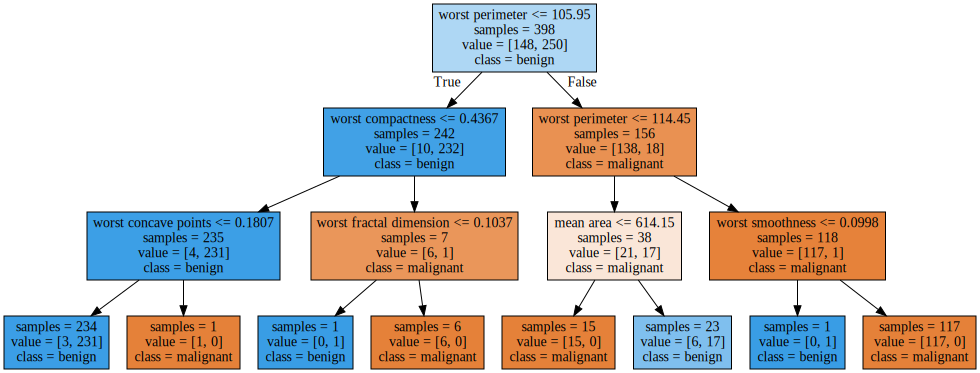

In [3]:
import graphviz

with open("mytree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

## Show feature importance

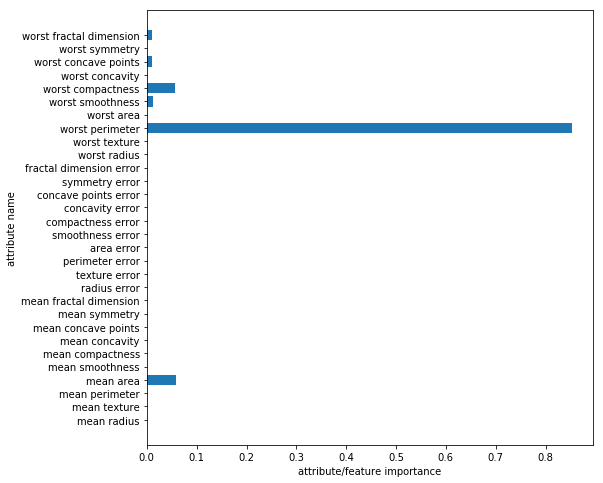

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
n_features = cancer.data.shape[1]
plt.barh(range(n_features), clf.feature_importances_,align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel('attribute/feature importance')
plt.ylabel('attribute name')
plt.show()